# **DSFM Exercise**: Simple predictions - linear and logit models (SOLUTIONS)

Creator: [Data Science for Managers - EPFL Program](https://www.dsfm.ch)  
Source:  [https://github.com/dsfm-org/code-bank.git](https://github.com/dsfm-org/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

-------------

## Overview

In this exercise, we consider a simple linear prediction problem. Given some toy data, we try to recover the parameters of a data generating process (DGP) and make predictions based on the fitted parameters.

The generated data are wrapped around [Pandas](https://pandas.pydata.org/getting_started.html), a powerful python library that allows to easily manipulate and plot tabular data.

---------

# Part 0: Setup

In [1]:
# plot data and add settings for nice visualizations
import matplotlib.pyplot as plt

%config InlineBackend.figure_format="retina"
plt.rcParams["figure.figsize"] = [8, 4]

# numerical matrix operations
import numpy as np    

# data science models
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.special import expit

# import pandas
import pandas as pd

# Part 1: Set up a linear DGP

Define a linear data generating process (DGP) as a line of the form `y = m * x + b` with the following coefficients:

- `m = 2`
- `b = 3`

**Q 1:** What are the values of `y` at `x` equal to 1, 2, 3, 4 and 5?

In [2]:
# function that implements our DGP

def dgp(x):
    """
    Linear DGP of the form y=m*x+b, where m=2 and b=3
    
    Parameter: 
        x (float): input value
    
    Return: 
        float: f(x) 
        
    """
    
    return 2 * x + 3

In [3]:
# toy data

X = [1, 2, 3, 4, 5]

y = []
for x in X:
    y.append(dgp(x))

In [4]:
# look at X

X

[1, 2, 3, 4, 5]

In [5]:
# look at y

y

[5, 7, 9, 11, 13]

# Part 2: Use the mean to make a prediction

In the most simple form, our "model" simply predicts the mean. 

**Q 1:** It's handy to store the data into a DataFrame. Create a new Pandas DataFrame `df` with the two columns `X` and `y` and visualize it.

In [6]:
df = pd.DataFrame({'X':X, 'y':y})
df

,X,y
0,1,5
1,2,7
2,3,9
3,4,11
4,5,13


**Q 2:** Plot the values of X and y. Does this DGP have any noise/variance?

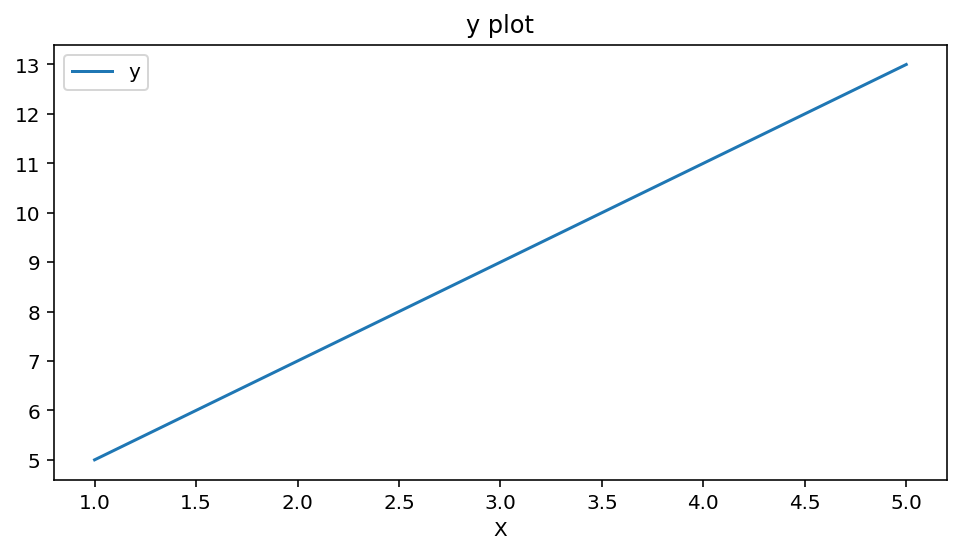

In [7]:
fig = df.plot.line(x='X', y='y', title="y plot")
fig;

**Q 3:** What is the mean of our outcome variable `y`?

In [8]:
# compute the mean

y_mean = df['y'].mean()
y_mean

9.0

**Q 4**: How well does the mean fit our DGP? Plot the mean of `y` and the values of `X` and `y`.

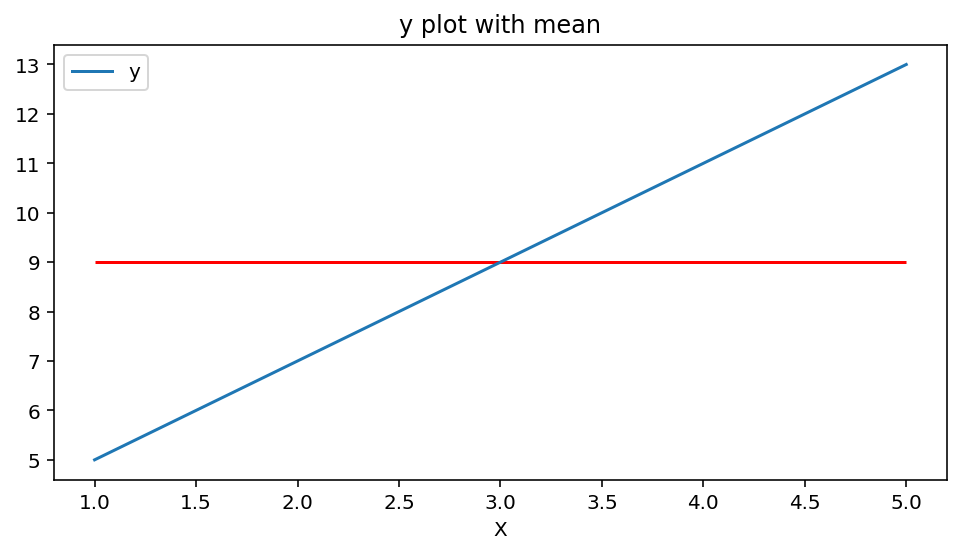

In [9]:
# plot mean prediction

fig = df.plot.line(x='X', y='y', title="y plot with mean")

# Add horizontal mean line 
fig.hlines(y_mean, xmin = min(X), xmax = max(X), colors='red');

As we can see, this prediction does not fit well. The prediction is biased and has no variance. In fact, no prediction will have variance as the DGP has no noice/variance.

# Part 3: Fit a linear regression and predict

We now move beyond the mean. We fit a linear regression, which tries to estimate the coefficients for `m` and `b` that best fit the data generating process from Part 1. 

**Q 1**: Fit a linear regression to `X` and `y`. Hint: do not forget to reshape the data into a two-dimensional shape. Why do we need to reshape our data?

In [10]:
# fit the linear regression 

X = df[['X']]
y = df['y']

reg = LinearRegression().fit(X, y)

**Q 2**: What is the R^2 score? What are the estimated coefficient and intercept values?

In [11]:
# evaluate the fit in terms of R^2 (i.e. variance explained)

reg.score(X, y)


1.0

In [12]:
# estimate coefficient m

reg.coef_


array([2.])

In [13]:
# estimate intercept b

reg.intercept_ 


3.0

**Q 3**: What is the predicted value of `y` at `x = 6`?

Given the DGP `y = m * x + b`, its true coefficients `m = 2` and `b = 3` and `x = 6`:

`y = m * x + b`

`y = 2 * x + 3`

`y = 2 * 6 + 3`

`y = 15`

Let's validate this prediction with our fitted model.

In [14]:
# predict at x = 6

reg.predict([[6]])

array([15.])

# Part 4: Set up a nonlinear DGP

We now consider toy data that was generated by a *nonlinear* and *noisy* DGP. We want to predict two classes, where `y` equals `1` or `0`, that depend only on the value of `x`. 

Think back to the Credit Default demo. In this example, `y` stands for defaulting and `x` might stand for your amount of debt. In this oversimplified model, the more debt you have, the more likely you are to default. We would like predictions to lie in the continuous inerval `[0,1]`.

**Q 1**: Generate a Gaussian random sample for values of `X` centered around `0`. Inspect the first 10 values of `X`.

In [15]:
# generate random samples with seed = 0 and look at the first 10 values of X

n_samples = 100
np.random.seed(0)

X = np.random.normal(size = n_samples)
X[:10]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

**Q 2**: For all values `X > 0`, set `y` equal to `1` and `0` otherwise. Add some random noise to `X`. Hint: the numerical value of the boolean `True` is 1 and `False` is 0.

In [16]:
# set y to 1 if X > 0

y = X > 0

# convert boolean values to numbers

y = y.astype(np.float)

# look at the first 10 entries of y

y[:10]

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1.])

In [17]:
# add some Gaussian noise around x = 0 and look the first 10 entries of X

X = X + 0.2 * np.random.normal(size = n_samples)
X[:10]

array([ 2.14068249,  0.1306054 ,  0.72464098,  2.43477254,  1.63293331,
       -0.58855364,  0.86736462, -0.30084817,  0.28136955,  0.70670146])

# Part 5: Plot toy data and fit a linear classifier (linear regression)

In this part, we simply plot the data. Plotting the data is key before fitting any statistical model. 

**Q 1**: Plot `X` and `y` on a scatterplot. Will a linear classifier fit these data well?

(-2.477704709602953, 2.43477254083306)

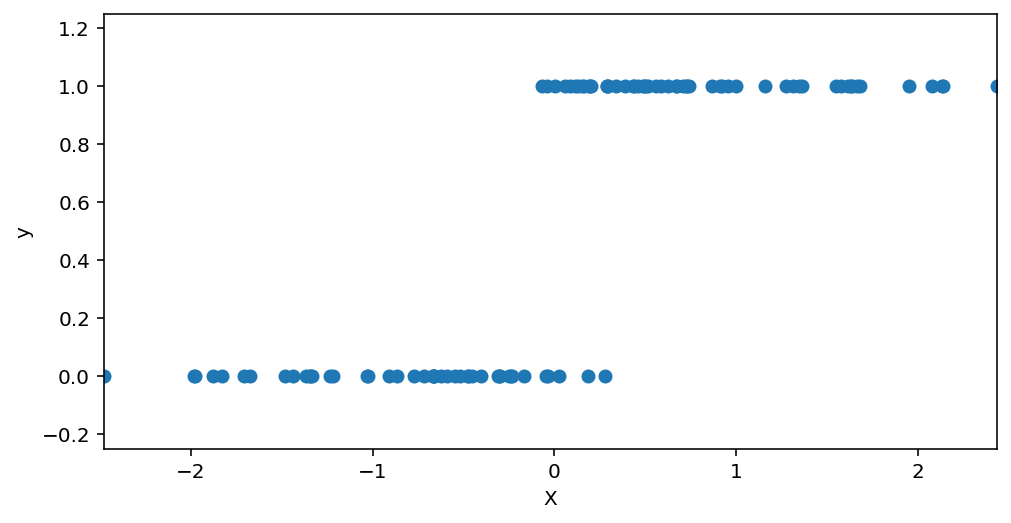

In [18]:
# scatterplot with axis labels

plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('X')
plt.ylim(-.25, 1.25)
plt.xlim(min(X), max(X))

**Q 2**: Fit a linear regression and look at the intercept. Does the intercept have a reasonable values? Why not?

In [19]:
# fit the linear regression (hint: call .reshape(-1, 1) on X to tell NumPy that there's only one predictor )

X = X.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

In [20]:
reg.intercept_

0.5216114089967183

**Q 3**: Plot the linear regression fit. What can you say about predictions for very small/large `x`?

(-2.477704709602953, 2.43477254083306)

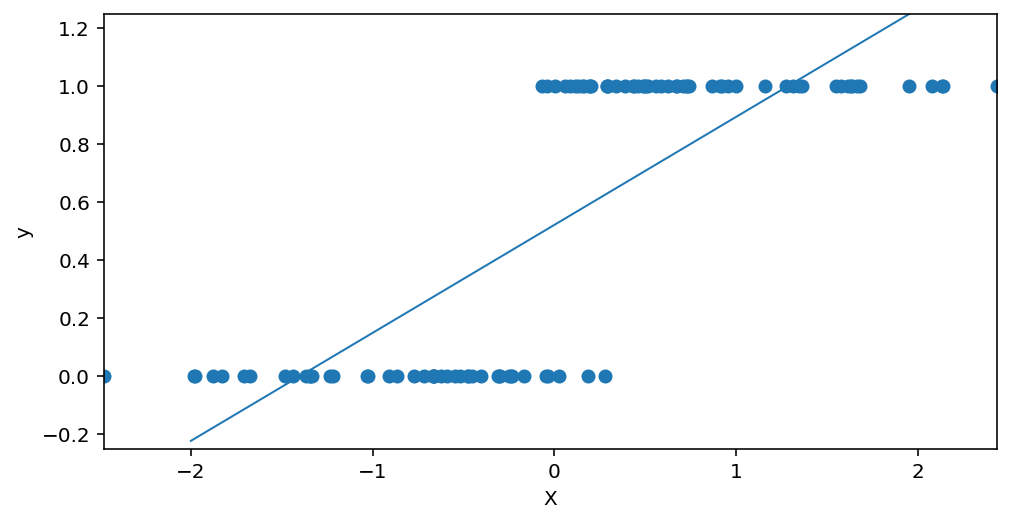

In [21]:
# plot linear regression fit

# np.linspace return evenly spaced numbers over a specified interval
X_test = np.linspace(-2, 2, 100).reshape(-1, 1)

# Option 1: manually extract the coefficients for the line y = m * x + b
y_pred_linear = reg.coef_ * X_test + reg.intercept_

# Option 2: use the .predict() function
# y_pred_linear = reg.predict(X_test)

plt.plot(X_test, y_pred_linear, linewidth=1)
plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('X')
plt.ylim(-.25, 1.25)
plt.xlim(min(X), max(X))

We can see that the linear classifier is not a good fit. While the intercept looks plausible, the model predicts values outside the `[0,1]` range.

# Part 6: Fit a nonlinear classifier (logistic regression)

We now implement a nonlinear classifier, which should better fit the data.

**Q 1**: Fit a logistic regression. 

In [22]:
# fit the logistic regression

logReg = LogisticRegression(solver='lbfgs').fit(X, y)


**Q 2**: Plot the fitted function. Hint: apply the expit() function to your prediction. This will convert the predictions to an inverse sigmoid shape. How does this model fit the data?

(-2.477704709602953, 2.43477254083306)

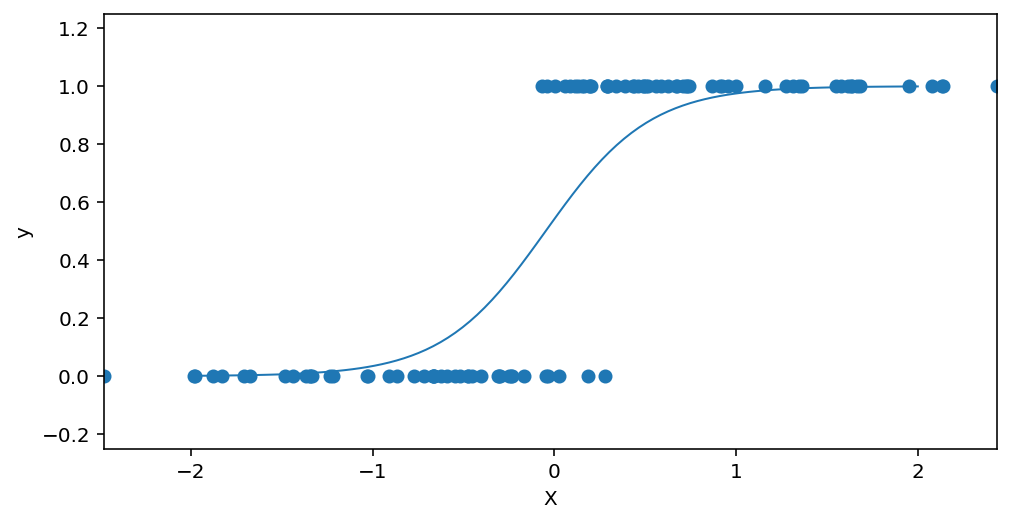

In [23]:
# plot linear regression fit

# Option 1: manually extract the coefficients (uncomment line below)
# y_pred_nonlinear = X_test * logReg.coef_ + logReg.intercept_
# transorm prediction to the inverse of the logit function (uncomment line below)
# y_pred_nonlinear = expit(y_pred_nonlinear)

# Option 2: use the .predict() function
y_pred_nonlinear = logReg.predict_proba(X_test)[:,1]

plt.plot(X_test, y_pred_nonlinear, linewidth=1)
plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('X')
plt.ylim(-.25, 1.25)
plt.xlim(min(X), max(X))
